In [ ]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

Question 1

In [ ]:
df30 = pd.read_csv("../data/UCLA_EE_grad_2030.csv",header=None)
df31 = pd.read_csv("../data/UCLA_EE_grad_2031.csv",header=None)
train = df30[:40]
test = pd.concat([df30[40:], df31], ignore_index=True)

In [ ]:
def distance(a, b):
    xd = abs(a[0] - b[0])
    yd = abs(a[1] - b[1])
    return math.sqrt(xd ** 2 + yd ** 2)

In [ ]:
def knn_classify(x, df, k=5, ytie=-1):
    points = df[[0,1]]
    labels = df[[2]][2]
    distances = points.apply(distance, axis=1, b=x) 
    k_indices = np.argsort(distances)[:k].tolist()
    k_classes = labels.iloc[k_indices]
    if (sum(k_classes) < 0):
        return -1
    elif (sum(k_classes) > 0):
        return 1
    else:
        return ytie

In [ ]:
def get_accuracies(df, tie):
    X = df[[0,1]]
    y = df[[2]][2]
    accuracies = []
    for j in range(1,12):
        correctly_classified = 0
        for i in range(X.shape[0]):
            x = X.iloc[i]
            guess = knn_classify(x, train, k=j, ytie=tie)
            if (guess == y[i]):
                correctly_classified += 1
        accuracy = correctly_classified / X.shape[0]
        accuracies.append(accuracy)
    return accuracies

In [ ]:
train_accuracies_0 = get_accuracies(train, -1)
test_accuracies_0 = get_accuracies(test, -1)
train_accuracies_1 = get_accuracies(train, 1)
test_accuracies_1 = get_accuracies(test, 1)

In [ ]:
plt.plot(train_accuracies_0)
plt.plot(test_accuracies_0)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K for ytie=0")
plt.legend(['Train', 'Test'])
plt.ylim((0.8,1))
plt.savefig("1b.jpg")

In [ ]:
plt.plot(train_accuracies_1)
plt.plot(test_accuracies_1)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K for ytie=1")
plt.legend(['Train', 'Test'])
plt.ylim((0.8,1))
plt.savefig("1a.jpg")

Question 2

In [421]:
data = [[-3, 9, 1], [-2.5, 6.25, 1], [3, 9, 1], [-1.5, 2.25, -1], [0,0,-1], [1,1,-1]]
df = pd.DataFrame(data, columns=["x1", "x2", "y"])

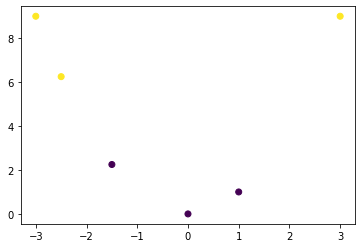

In [444]:
plt.scatter(df["x1"], df["x2"], c = df["y"])
plt.savefig("2a.jpg")